In [486]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import re
data = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.1.xlsx"
data = pd.read_excel(data)
data2 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.2.xlsx"
data2 = pd.read_excel(data2)
data3 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.3.xlsx"
data3 = pd.read_excel(data3)
data4 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.4.xlsx"
data4 = pd.read_excel(data4)
data5 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.5.xlsx"
data5 = pd.read_excel(data5)
data6 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.6.xlsx"
data6 = pd.read_excel(data6)
data7 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.7.xlsx"
data7 = pd.read_excel(data7)
data8 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.8.xlsx"
data8 = pd.read_excel(data8)
data9 = "C:/Programación/Lab Intermedio/Rayos X/corriente 0.9.xlsx"
data9 = pd.read_excel(data9)
data10 = "C:/Programación/Lab Intermedio/Rayos X/corriente 1.xlsx"
data10 = pd.read_excel(data10)

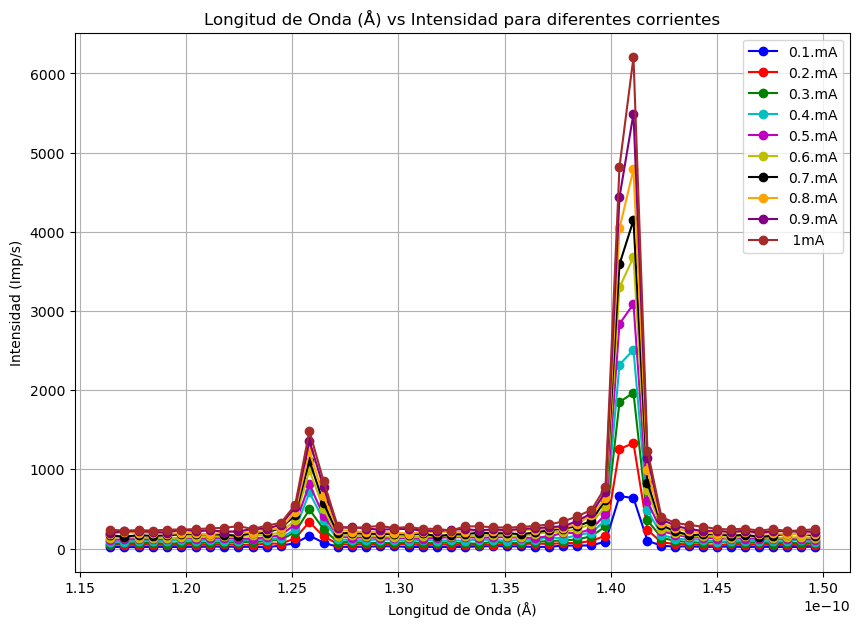

In [487]:
d = 2.014*10**(-10)  # Ajustable si es necesario
n=1
# 

# Lista de archivos (aquí pondrías las rutas de tus archivos)
file_paths = [
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.1.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.2.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.3.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.4.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.5.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.6.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.7.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.8.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 0.9.xlsx',
    'C:/Programación/Lab Intermedio/Rayos X/corriente 1.xlsx'
]

# Colores para diferenciar las curvas en las gráficas
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Generar la gráfica de theta vs intensidad para los 10 archivos
plt.figure(figsize=(10, 7))
for i, file_path in enumerate(file_paths):
    data = pd.read_excel(file_path)
    theta =2*d*np.sin( data['theta/°']*np.pi/180)/n
    intensidad = data['R(35kV)/Imp/s']
    # Graficar theta vs intensidad
    if 9>i:
        plt.plot(theta, intensidad, marker='o', linestyle='-', color=colors[i % len(colors)], label=f'0.{i+1}.mA')
    else:
        plt.plot(theta, intensidad, marker='o', linestyle='-', color=colors[i % len(colors)], label=f' {1}mA')
plt.title('Longitud de Onda (Å) vs Intensidad para diferentes corrientes')
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Intensidad (Imp/s)')
plt.legend()
plt.grid(True)
plt.show()

# Generar la gráfica de theta vs longitud de onda (ley de Bragg) para los 10 archivos


In [488]:
angulo_objetivo = 20.5 

def extraer_corriente(file_path):
    # Buscar un número en el nombre del archivo usando expresiones regulares
    match = re.search(r'corriente\s?(\d+\.?\d*)', file_path)
    if match:
        return float(match.group(1))  # Devolver la corriente como número flotante
    return None  # En caso de que no se encuentre la corriente

# Lista para almacenar los pares de corriente vs intensidad
corriente_vs_intensidad = []
corriente_vs_intensidad2 = []
# Procesar cada archivo
for file_path in file_paths:
    # Leer el archivo de datos
    data = pd.read_excel(file_path)
    
    # Extraer theta e intensidad
    theta = data['theta/°']
    intensidad = data['R(35kV)/Imp/s']
    
    # Buscar la intensidad asociada al ángulo específico
    intensidad_objetivo = intensidad[np.isclose(theta, angulo_objetivo, atol=0.1)]  # Tolerancia de ±0.1 grados
    intensidad_objetivo2 = intensidad[np.isclose(theta, ang_bel, atol=0.1)]
    if not intensidad_objetivo.empty:
        # Extraer la corriente desde el nombre del archivo
        corriente = extraer_corriente(file_path)
        corriente2 = extraer_corriente(file_path)
        if corriente is not None:
            # Añadir el par corriente vs intensidad a la lista
            corriente_vs_intensidad.append((corriente, intensidad_objetivo.iloc[0]))
            corriente_vs_intensidad2.append((corriente2, intensidad_objetivo2.iloc[0]))
# Convertir la lista a un DataFrame para mayor facilidad
df_corriente_intensidad = pd.DataFrame(corriente_vs_intensidad, columns=['Corriente', 'Intensidad'])
df_corriente_intensidad2 = pd.DataFrame(corriente_vs_intensidad2, columns=['Corriente', 'Intensidad'])
# Ordenar los datos por corriente para una gráfica más clara
df_corriente_intensidad = df_corriente_intensidad.sort_values(by='Corriente')
df_corriente_intensidad2 = df_corriente_intensidad2.sort_values(by='Corriente')
# Graficar corriente vs intensidad

In [489]:
df_corriente_intensidad['Corriente']=df_corriente_intensidad['Corriente']*10**(-3)
df_corriente_intensidad2['Corriente']=df_corriente_intensidad2['Corriente']*10**(-3)

In [490]:
param5, cov5= scipy.optimize.curve_fit(lambda t,a,b: a*(t)+(b),  df_corriente_intensidad['Corriente'],df_corriente_intensidad['Intensidad'])
incert5 =np.sqrt(np.diag(cov5))
param5, incert5

(array([4.54103031e+06, 4.15133330e+02]),
 array([1.40093703e+05, 8.69258592e+01]))

In [491]:
param6, cov6= scipy.optimize.curve_fit(lambda t,a,b: a*(t)+(b),  df_corriente_intensidad2['Corriente'],df_corriente_intensidad2['Intensidad'])
incert6 =np.sqrt(np.diag(cov6))
param6, incert6

(array([5.44121212e+05, 2.91333332e+01]),
 array([1.36203279e+04, 8.45119117e+00]))

In [492]:
df_corriente_intensidad['Intensidad'][len(df_corriente_intensidad['Intensidad'])-1]

4823

In [493]:
X5

array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009, 0.001 ])

In [494]:
X5=np.linspace(df_corriente_intensidad['Corriente'][0], df_corriente_intensidad['Corriente'][len(df_corriente_intensidad['Corriente'])-1], len(df_corriente_intensidad['Corriente']))
Y5=param5[0]*X5+(param5[1])
X6=np.linspace(df_corriente_intensidad2['Corriente'][0], df_corriente_intensidad2['Corriente'][len(df_corriente_intensidad2['Corriente'])-1], len(df_corriente_intensidad2['Corriente']))
Y6=param6[0]*X6+(param6[1])

In [495]:
param5, 

(array([4.54103031e+06, 4.15133330e+02]),)

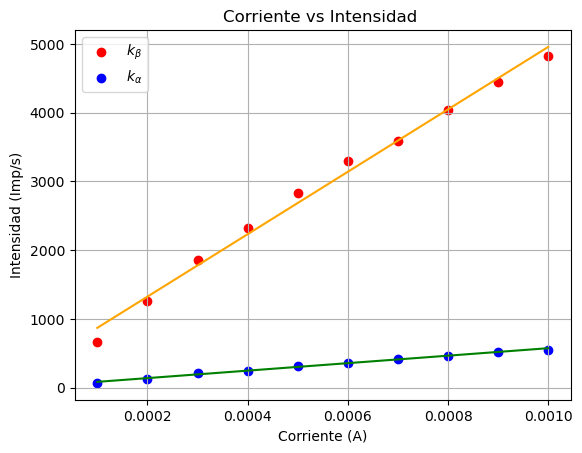

In [496]:
fig3, ax3 = plt.subplots()

ax3.scatter(df_corriente_intensidad['Corriente'], df_corriente_intensidad['Intensidad'], marker='o', linestyle='-', color='r',  label='$k_{β}$')
ax3.plot(X5,Y5,color='orange')
ax3.scatter(df_corriente_intensidad2['Corriente'], df_corriente_intensidad2['Intensidad'], marker='o', linestyle='-', color='b', label='$k_{α}$')
ax3.plot(X6,Y6, color='g')
ax3.set_title(f'Corriente vs Intensidad ')
ax3.set_xlabel('Corriente (A)')
ax3.set_ylabel('Intensidad (Imp/s)')
ax3.grid(True)
ax3.legend()

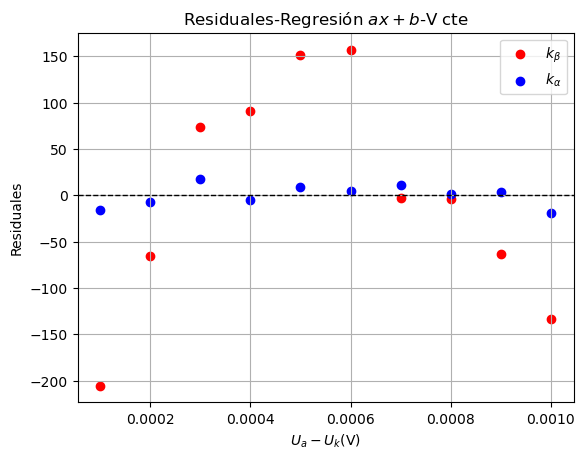

In [497]:
fig2, ax2 = plt.subplots()
ax2.scatter(df_corriente_intensidad['Corriente'], df_corriente_intensidad['Intensidad']-Y5, marker='o', linestyle='-', color='r', label='$k_{β}$')

ax2.scatter(df_corriente_intensidad2['Corriente'], df_corriente_intensidad2['Intensidad']-Y6, marker='o', linestyle='-', color='b', label='$k_{α}$')

# Añadir etiquetas y título
ax2.set_xlabel('$U_{a}-U_{k}$(V)')
ax2.set_ylabel('Residuales')
ax2.set_title(f'Residuales-Regresión $ax+b$-V cte')
ax2.grid(True)
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.legend()

In [498]:

al=1.410635e-10 #37
ang_al=20.5
bel=1.258085e-10 #14
ang_bel=18.2

In [499]:
fila_angulo3 = data[data['theta/°'] == ang_al]
fila_angulo4 = data[data['theta/°'] == ang_bel]

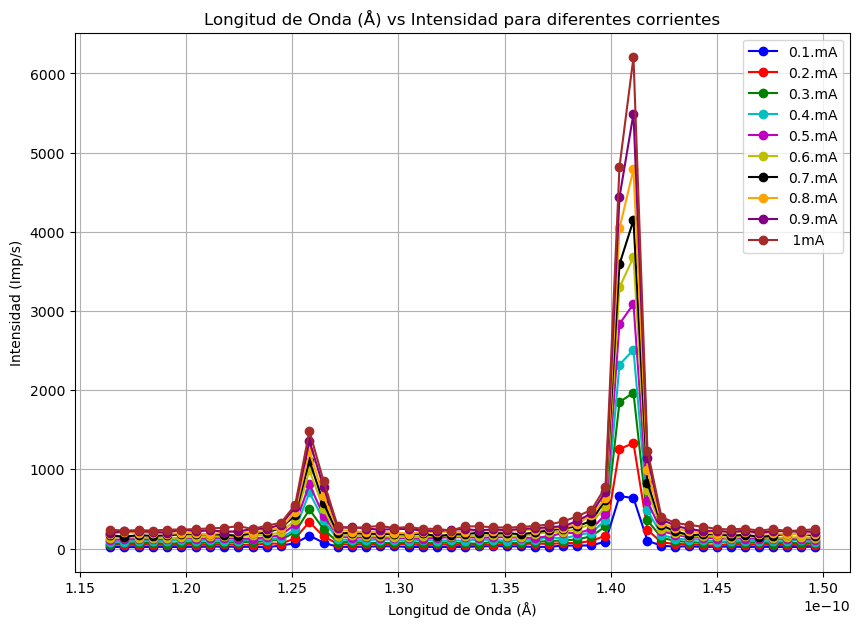

In [500]:
plt.figure(figsize=(10, 7))
for i, file_path in enumerate(file_paths):
    data = pd.read_excel(file_path)
    theta =2*d*np.sin( data['theta/°']*np.pi/180)/n
    intensidad = data['R(35kV)/Imp/s']
    # Graficar theta vs intensidad
    if 9>i:
        plt.plot(theta, intensidad, marker='o', linestyle='-', color=colors[i % len(colors)], label=f'0.{i+1}.mA')
    else:
        plt.plot(theta, intensidad, marker='o', linestyle='-', color=colors[i % len(colors)], label=f' {1}mA')
plt.title('Longitud de Onda (Å) vs Intensidad para diferentes corrientes')
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Intensidad (Imp/s)')
plt.legend()
plt.grid(True)
plt.show()

In [501]:
data['theta/°']=data['theta/°']*np.pi/180

In [502]:
L=2*d*np.sin(data['theta/°'])/n

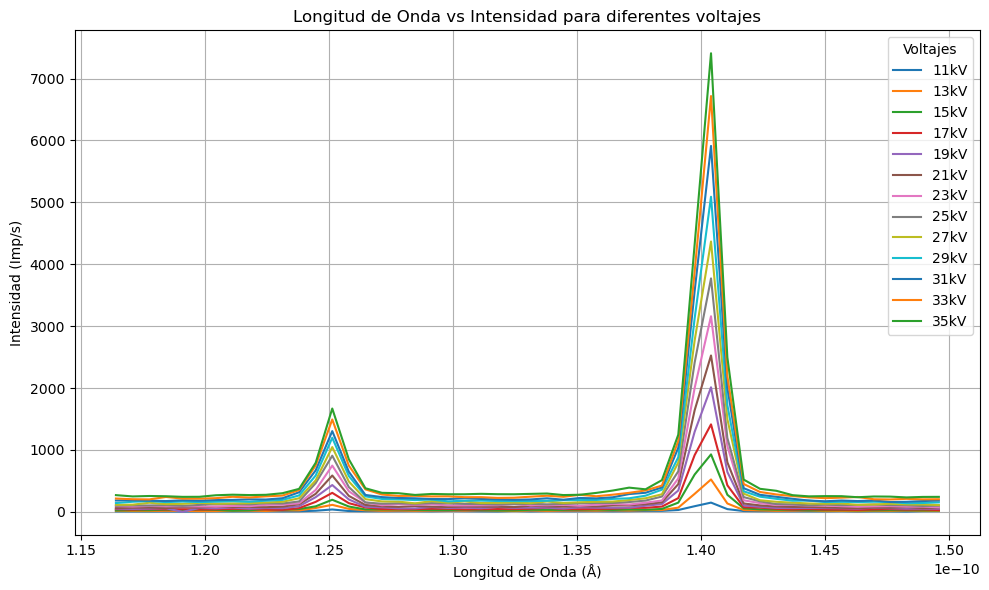

In [503]:
file_path = 'C:/Programación/Lab Intermedio/Rayos X/corriente constante.xlsx'
data = pd.read_excel(file_path, sheet_name='Hoja1')

# Definir theta y las columnas de intensidad
theta = L
intensity_columns = data.columns[1:]

# Crear la gráfica
plt.figure(figsize=(10, 6))
for col in intensity_columns:
    plt.plot(theta, data[col], label=col)

# Añadir etiquetas y título
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Intensidad (Imp/s)')
plt.title('Longitud de Onda vs Intensidad para diferentes voltajes')
plt.legend(title="Voltajes")
plt.grid(True)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [504]:
Uk=9.979*(10**3)
#9,979keV.
V=np.arange(11,36,2)
M=V*(10**3)-Uk
M

array([ 1021.,  3021.,  5021.,  7021.,  9021., 11021., 13021., 15021.,
       17021., 19021., 21021., 23021., 25021.])

In [505]:
alpha=1.404048e-10
ang_a=20.4

In [506]:
beta= 1.251405e-10
ang_b=18.1

In [507]:
alpha=data[data['theta/°']==ang_a]
alpha

,theta/°,11kV,13kV,15kV,17kV,19kV,21kV,23kV,25kV,27kV,29kV,31kV,33kV,35kV
36,20.4,149,523,928,1413,2012,2526,3160,3771,4367,5090,5911,6717,7408


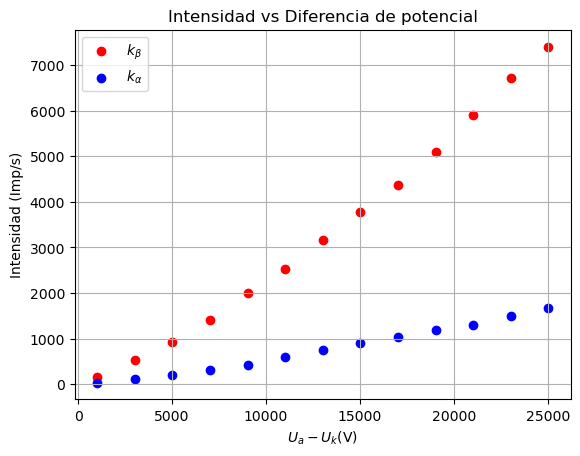

In [508]:
angulo_especifico = 20.4

fig, ax = plt.subplots()
# Filtrar la fila que coincide con el ángulo especificado
fila_angulo = data[data['theta/°'] == angulo_especifico]
fila_angulo2 = data[data['theta/°'] == ang_b]
# Extraer los voltajes y las intensidades correspondientes
voltajes = M  # Extraer los valores de voltaje de los nombres de las columnas
intensidades = fila_angulo.iloc[0, 1:].values  # Obtener los valores de intensidad de esa fila
intensidades2 = fila_angulo2.iloc[0, 1:].values
# Graficar los voltajes vs intensidades
#ax.figure(figsize=(8, 5))
ax.scatter(voltajes, intensidades, marker='o', linestyle='-', color='r', label='$k_{β}$')
ax.scatter(voltajes, intensidades2, marker='o', linestyle='-', color='b', label='$k_{α}$')
# Añadir etiquetas y título
ax.set_xlabel('$U_{a}-U_{k}$(V)')
ax.set_ylabel('Intensidad (Imp/s)')
ax.set_title(f'Intensidad vs Diferencia de potencial')
ax.grid(True)
ax.legend()
#ax.tight_layout()

# Mostrar la gráfica


In [509]:
param, cov= scipy.optimize.curve_fit(lambda t,a,b: a*(t)**(b),  voltajes,intensidades)
incert =np.sqrt(np.diag(cov))
param, incert

(array([0.01299563, 1.30854293]), array([0.0017602 , 0.01369162]))

In [510]:
param2, cov2= scipy.optimize.curve_fit(lambda t,a,b: a*(t)**(b),  voltajes,intensidades2)
incert2 =np.sqrt(np.diag(cov2))
param2, incert2

(array([0.00429378, 1.27091683]), array([0.00099425, 0.02342073]))

In [511]:
X=np.linspace(voltajes[0], voltajes[-1], len(voltajes))
Y=param[0]*X**(param[1])
X2=np.linspace(voltajes[0], voltajes[-1], len(voltajes))
Y2=param2[0]*X2**(param2[1])

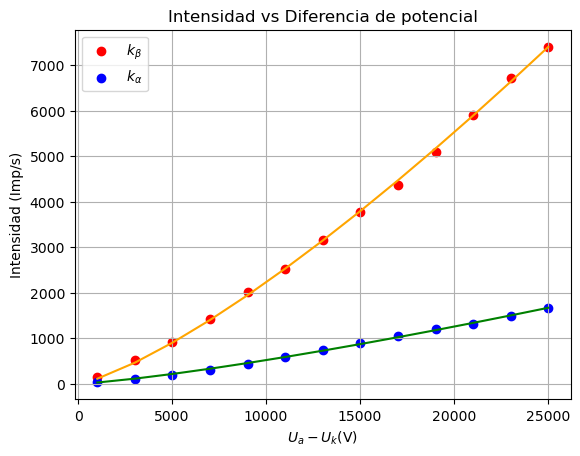

In [512]:
angulo_especifico = 20.4

fig, ax = plt.subplots()
# Filtrar la fila que coincide con el ángulo especificado
fila_angulo = data[data['theta/°'] == angulo_especifico]
fila_angulo2 = data[data['theta/°'] == ang_b]
# Extraer los voltajes y las intensidades correspondientes
voltajes = M  # Extraer los valores de voltaje de los nombres de las columnas
intensidades = fila_angulo.iloc[0, 1:].values  # Obtener los valores de intensidad de esa fila
intensidades2 = fila_angulo2.iloc[0, 1:].values
# Graficar los voltajes vs intensidades
#ax.figure(figsize=(8, 5))
ax.scatter(voltajes, intensidades, marker='o', linestyle='-', color='r', label='$k_{β}$')
ax.plot(X,Y, color='orange')
ax.scatter(voltajes, intensidades2, marker='o', linestyle='-', color='b', label='$k_{α}$')
ax.plot(X2,Y2, color='g')
# Añadir etiquetas y título
ax.set_xlabel('$U_{a}-U_{k}$(V)')
ax.set_ylabel('Intensidad (Imp/s)')
ax.set_title(f'Intensidad vs Diferencia de potencial')
ax.grid(True)
ax.legend()
#ax.tight_layout()

# Mostrar la gráfica


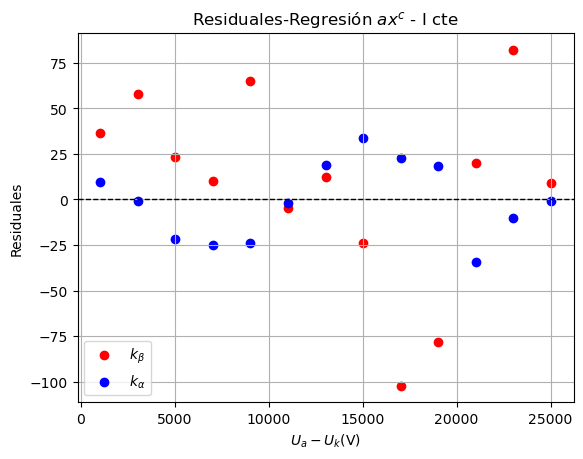

In [513]:
fig1, ax1 = plt.subplots()
Res=intensidades-Y
ax1.scatter(voltajes, intensidades-Y, marker='o', linestyle='-', color='r', label='$k_{β}$')

ax1.scatter(voltajes, intensidades2-Y2, marker='o', linestyle='-', color='b', label='$k_{α}$')

# Añadir etiquetas y título
ax1.set_xlabel('$U_{a}-U_{k}$(V)')
ax1.set_ylabel('Residuales')
ax1.set_title(f'Residuales-Regresión $ax^c$ - I cte')
ax1.grid(True)
ax1.axhline(0, color='black', linewidth=1, linestyle='--')
ax1.legend()

In [514]:
N=M**(3/2)

In [515]:
param3, cov3= scipy.optimize.curve_fit(lambda t,a,b: a*(t)+(b),  N,intensidades)
incert3 =np.sqrt(np.diag(cov3))
param3

array([1.83243816e-03, 3.06200040e+02])

In [516]:
param4, cov4= scipy.optimize.curve_fit(lambda t,a,b: a*(t)+(b),  N,intensidades2)
incert4 =np.sqrt(np.diag(cov4))
param4

array([4.15055970e-04, 7.50829292e+01])

In [517]:
X3=np.linspace(N[0], N[-1], len(N))
Y3=param3[0]*X3+(param3[1])
X4=np.linspace(N[0], N[-1], len(N))
Y4=param4[0]*X4+(param4[1])

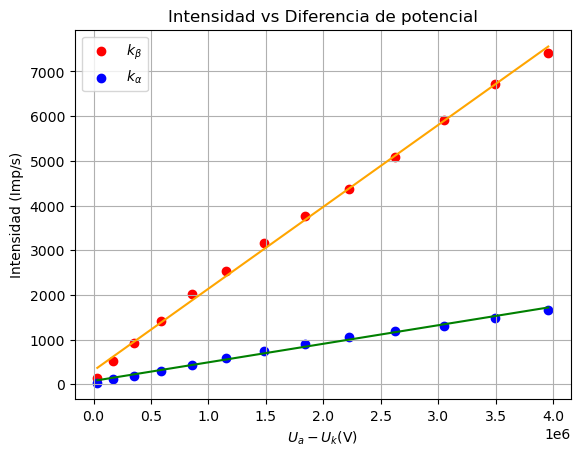

In [518]:
angulo_especifico = 20.4

fig2, ax2 = plt.subplots()
# Filtrar la fila que coincide con el ángulo especificado
voltajes = n  # Extraer los valores de voltaje de los nombres de las columnas
intensidades = fila_angulo.iloc[0, 1:].values  # Obtener los valores de intensidad de esa fila
intensidades2 = fila_angulo2.iloc[0, 1:].values

ax2.scatter(N, intensidades, marker='o', linestyle='-', color='r', label='$k_{β}$')
ax2.plot(X3,Y3, color='orange')
ax2.scatter(N, intensidades2, marker='o', linestyle='-', color='b', label='$k_{α}$')
ax2.plot(X4,Y4, color='g')
# Añadir etiquetas y título
ax2.set_xlabel('$U_{a}-U_{k}$(V)')
ax2.set_ylabel('Intensidad (Imp/s)')
ax2.set_title(f'Intensidad vs Diferencia de potencial')
ax2.grid(True)
ax2.legend()
#ax.tight_layout()

# Mostrar la gráfica


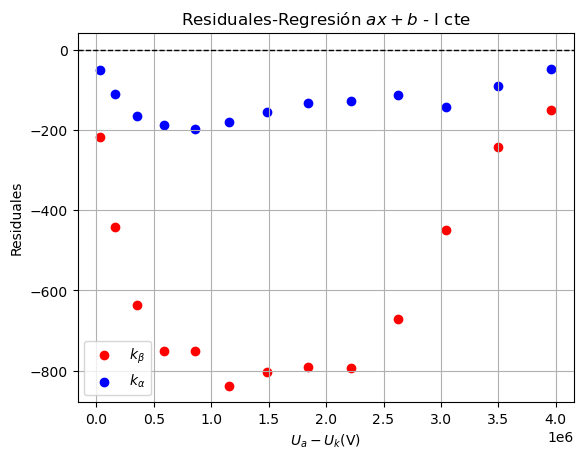

In [519]:
fig1, ax1 = plt.subplots()
Res=intensidades-Y
ax1.scatter(N, intensidades-Y3, marker='o', linestyle='-', color='r', label='$k_{β}$')

ax1.scatter(N, intensidades2-Y4, marker='o', linestyle='-', color='b', label='$k_{α}$')

# Añadir etiquetas y título
ax1.set_xlabel('$U_{a}-U_{k}$(V)')
ax1.set_ylabel('Residuales')
ax1.set_title(f'Residuales-Regresión $ax+b$ - I cte')
ax1.grid(True)
ax1.axhline(0, color='black', linewidth=1, linestyle='--')
ax1.legend()